<a href="https://colab.research.google.com/github/Mostafa8898/work-experince/blob/main/titanc_%24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [298]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from sklearn.svm import SVC
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [299]:
df = pd.read_csv('/content/titanic.csv')

In [300]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [302]:
df.dropna(how='all',inplace= True)

In [303]:
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

<Axes: >

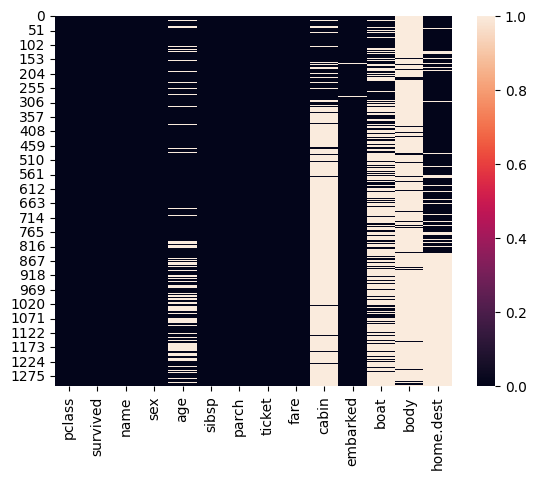

In [304]:
sns.heatmap(df.isna())

In [305]:
df['age'] =df['age'].fillna(df['age'].mean())

<Axes: >

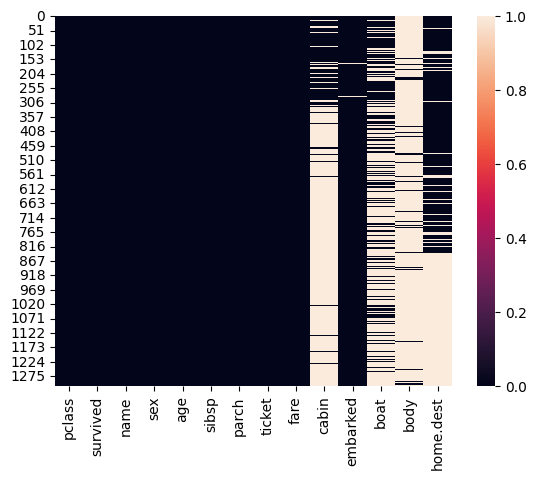

In [306]:
sns.heatmap(df.isna())

In [307]:
##(اdrop data)
df.drop('cabin',axis=1,inplace=True)

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   embarked   1307 non-null   object 
 10  boat       486 non-null    object 
 11  body       121 non-null    float64
 12  home.dest  745 non-null    object 
dtypes: float64(7), object(6)
memory usage: 143.2+ KB


In [309]:
## (categorical features)
df['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [310]:
df['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [311]:
sex =pd.get_dummies(df['sex'],drop_first=True)
sex

,male
0,0
1,1
2,0
3,1
4,0
...,...
1304,0
1305,0
1306,1
1307,1


In [312]:
emb =pd.get_dummies(df['embarked'])
emb

,C,Q,S
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
1304,1,0,0
1305,1,0,0
1306,1,0,0
1307,1,0,0


In [313]:
newdf=pd.concat([df,sex,emb],axis=1)
newdf

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,male,C,Q,S
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.000000,0.0,0.0,24160,211.3375,S,2,NaN,"St Louis, MO",0,0,0,1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.916700,1.0,2.0,113781,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,0,0,1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.000000,1.0,2.0,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,0,0,1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1.0,2.0,113781,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1,0,0,1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1.0,2.0,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.500000,1.0,0.0,2665,14.4542,C,NaN,328.0,NaN,0,1,0,0
1305,3.0,0.0,"Zabour, Miss. Thamine",female,29.881135,1.0,0.0,2665,14.4542,C,NaN,NaN,NaN,0,1,0,0
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.500000,0.0,0.0,2656,7.2250,C,NaN,304.0,NaN,1,1,0,0
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.000000,0.0,0.0,2670,7.2250,C,NaN,NaN,NaN,1,1,0,0


In [314]:
newdf.drop(['name','sex','ticket','boat','body','home.dest','embarked'],axis=1,inplace=True)

In [315]:
newdf

,pclass,survived,age,sibsp,parch,fare,male,C,Q,S
0,1.0,1.0,29.000000,0.0,0.0,211.3375,0,0,0,1
1,1.0,1.0,0.916700,1.0,2.0,151.5500,1,0,0,1
2,1.0,0.0,2.000000,1.0,2.0,151.5500,0,0,0,1
3,1.0,0.0,30.000000,1.0,2.0,151.5500,1,0,0,1
4,1.0,0.0,25.000000,1.0,2.0,151.5500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,14.500000,1.0,0.0,14.4542,0,1,0,0
1305,3.0,0.0,29.881135,1.0,0.0,14.4542,0,1,0,0
1306,3.0,0.0,26.500000,0.0,0.0,7.2250,1,1,0,0
1307,3.0,0.0,27.000000,0.0,0.0,7.2250,1,1,0,0


In [316]:
newdf.rename(columns={'male':'gender'},inplace=True)

In [317]:
newdf

,pclass,survived,age,sibsp,parch,fare,gender,C,Q,S
0,1.0,1.0,29.000000,0.0,0.0,211.3375,0,0,0,1
1,1.0,1.0,0.916700,1.0,2.0,151.5500,1,0,0,1
2,1.0,0.0,2.000000,1.0,2.0,151.5500,0,0,0,1
3,1.0,0.0,30.000000,1.0,2.0,151.5500,1,0,0,1
4,1.0,0.0,25.000000,1.0,2.0,151.5500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,14.500000,1.0,0.0,14.4542,0,1,0,0
1305,3.0,0.0,29.881135,1.0,0.0,14.4542,0,1,0,0
1306,3.0,0.0,26.500000,0.0,0.0,7.2250,1,1,0,0
1307,3.0,0.0,27.000000,0.0,0.0,7.2250,1,1,0,0


<Axes: xlabel='survived', ylabel='count'>

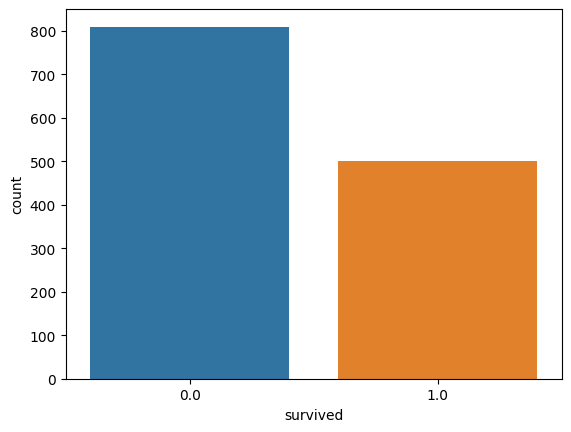

In [318]:
##exploratory data anaylsis
sns.countplot(x='survived',data=newdf)

<Axes: xlabel='survived', ylabel='count'>

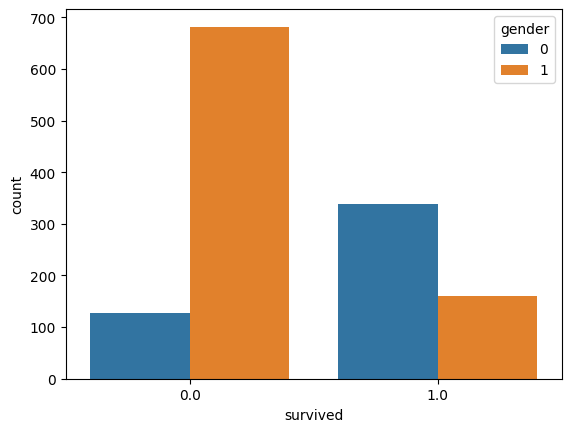

In [319]:
sns.countplot(x='survived',data=newdf,hue='gender')

<Axes: >

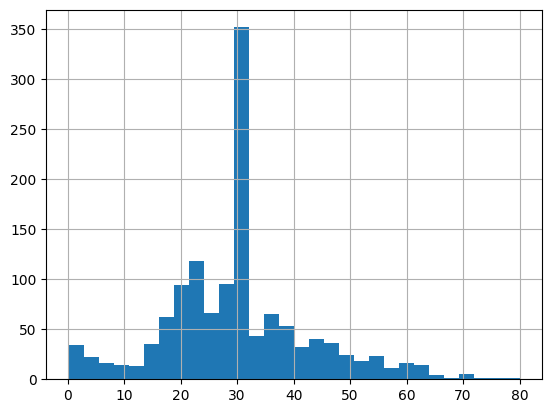

In [320]:
newdf['age'].hist(bins=30)

<Axes: >

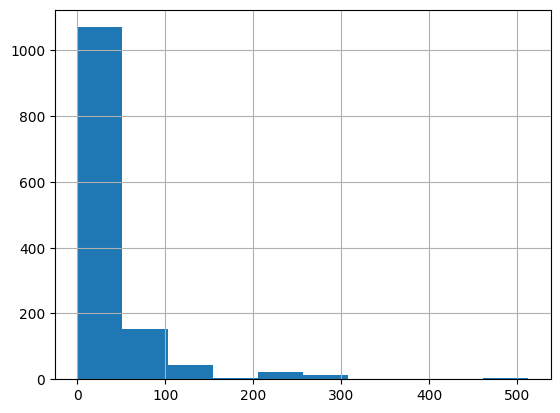

In [321]:
newdf['fare'].hist()

In [322]:
##create model
y=newdf['survived']
X=newdf.drop('survived',axis=1)


In [323]:
missing_values = X.isnull()
print(missing_values)
X.fillna(X.mean(), inplace=True)
(missing_values).value_counts()

      pclass    age  sibsp  parch   fare  gender      C      Q      S
0      False  False  False  False  False   False  False  False  False
1      False  False  False  False  False   False  False  False  False
2      False  False  False  False  False   False  False  False  False
3      False  False  False  False  False   False  False  False  False
4      False  False  False  False  False   False  False  False  False
...      ...    ...    ...    ...    ...     ...    ...    ...    ...
1304   False  False  False  False  False   False  False  False  False
1305   False  False  False  False  False   False  False  False  False
1306   False  False  False  False  False   False  False  False  False
1307   False  False  False  False  False   False  False  False  False
1308   False  False  False  False  False   False  False  False  False

[1309 rows x 9 columns]


pclass  age    sibsp  parch  fare   gender  C      Q      S    
False   False  False  False  False  False   False  False  False    1308
                             True   False   False  False  False       1
dtype: int64

In [324]:
from sklearn.model_selection import train_test_split
sc = StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [326]:
X_train.shape

(1047, 9)

In [327]:
X_test.shape

(262, 9)

In [328]:
y_train.shape

(1047,)

In [329]:
y_test.shape

(262,)

In [330]:
from sklearn.linear_model import LogisticRegression


In [331]:
##model building
model= LogisticRegression(max_iter=5000)



In [332]:
##model training
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [333]:
##model prediction
y_pred=model.predict(X_test)

In [334]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0.

In [335]:
y_test.values

array([0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 1.

In [336]:
confusion_matrix(y_test,y_pred)

array([[127,  17],
       [ 42,  76]])

In [337]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.88      0.81       144
         1.0       0.82      0.64      0.72       118

    accuracy                           0.77       262
   macro avg       0.78      0.76      0.77       262
weighted avg       0.78      0.77      0.77       262

